In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re

from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [2]:
# 載入數據至Pandas資料表 DataFrame

dfTrain = pd.DataFrame(pd.read_csv("/share/all/train.csv"))
dfTest = pd.DataFrame(pd.read_csv("/share/all/test.csv"))

dfTrain.head(5) # 看資料表前五行

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 觀察資料

In [3]:
## 將資料內容轉存至共同變數
df = dfTrain.iloc[:, :-1]

In [4]:
# 觀察欄位名 屬性 非空值筆數
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#(資料筆數,欄位數)
df.shape

(1460, 80)

In [6]:
# 觀察欄位不重複值
df.apply(lambda x:x.unique().shape[0],axis=0)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          5
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         6
GarageType          7
GarageYrBlt        98
GarageFinish        4
GarageCars          5
GarageArea        441
GarageQual          6
GarageCond

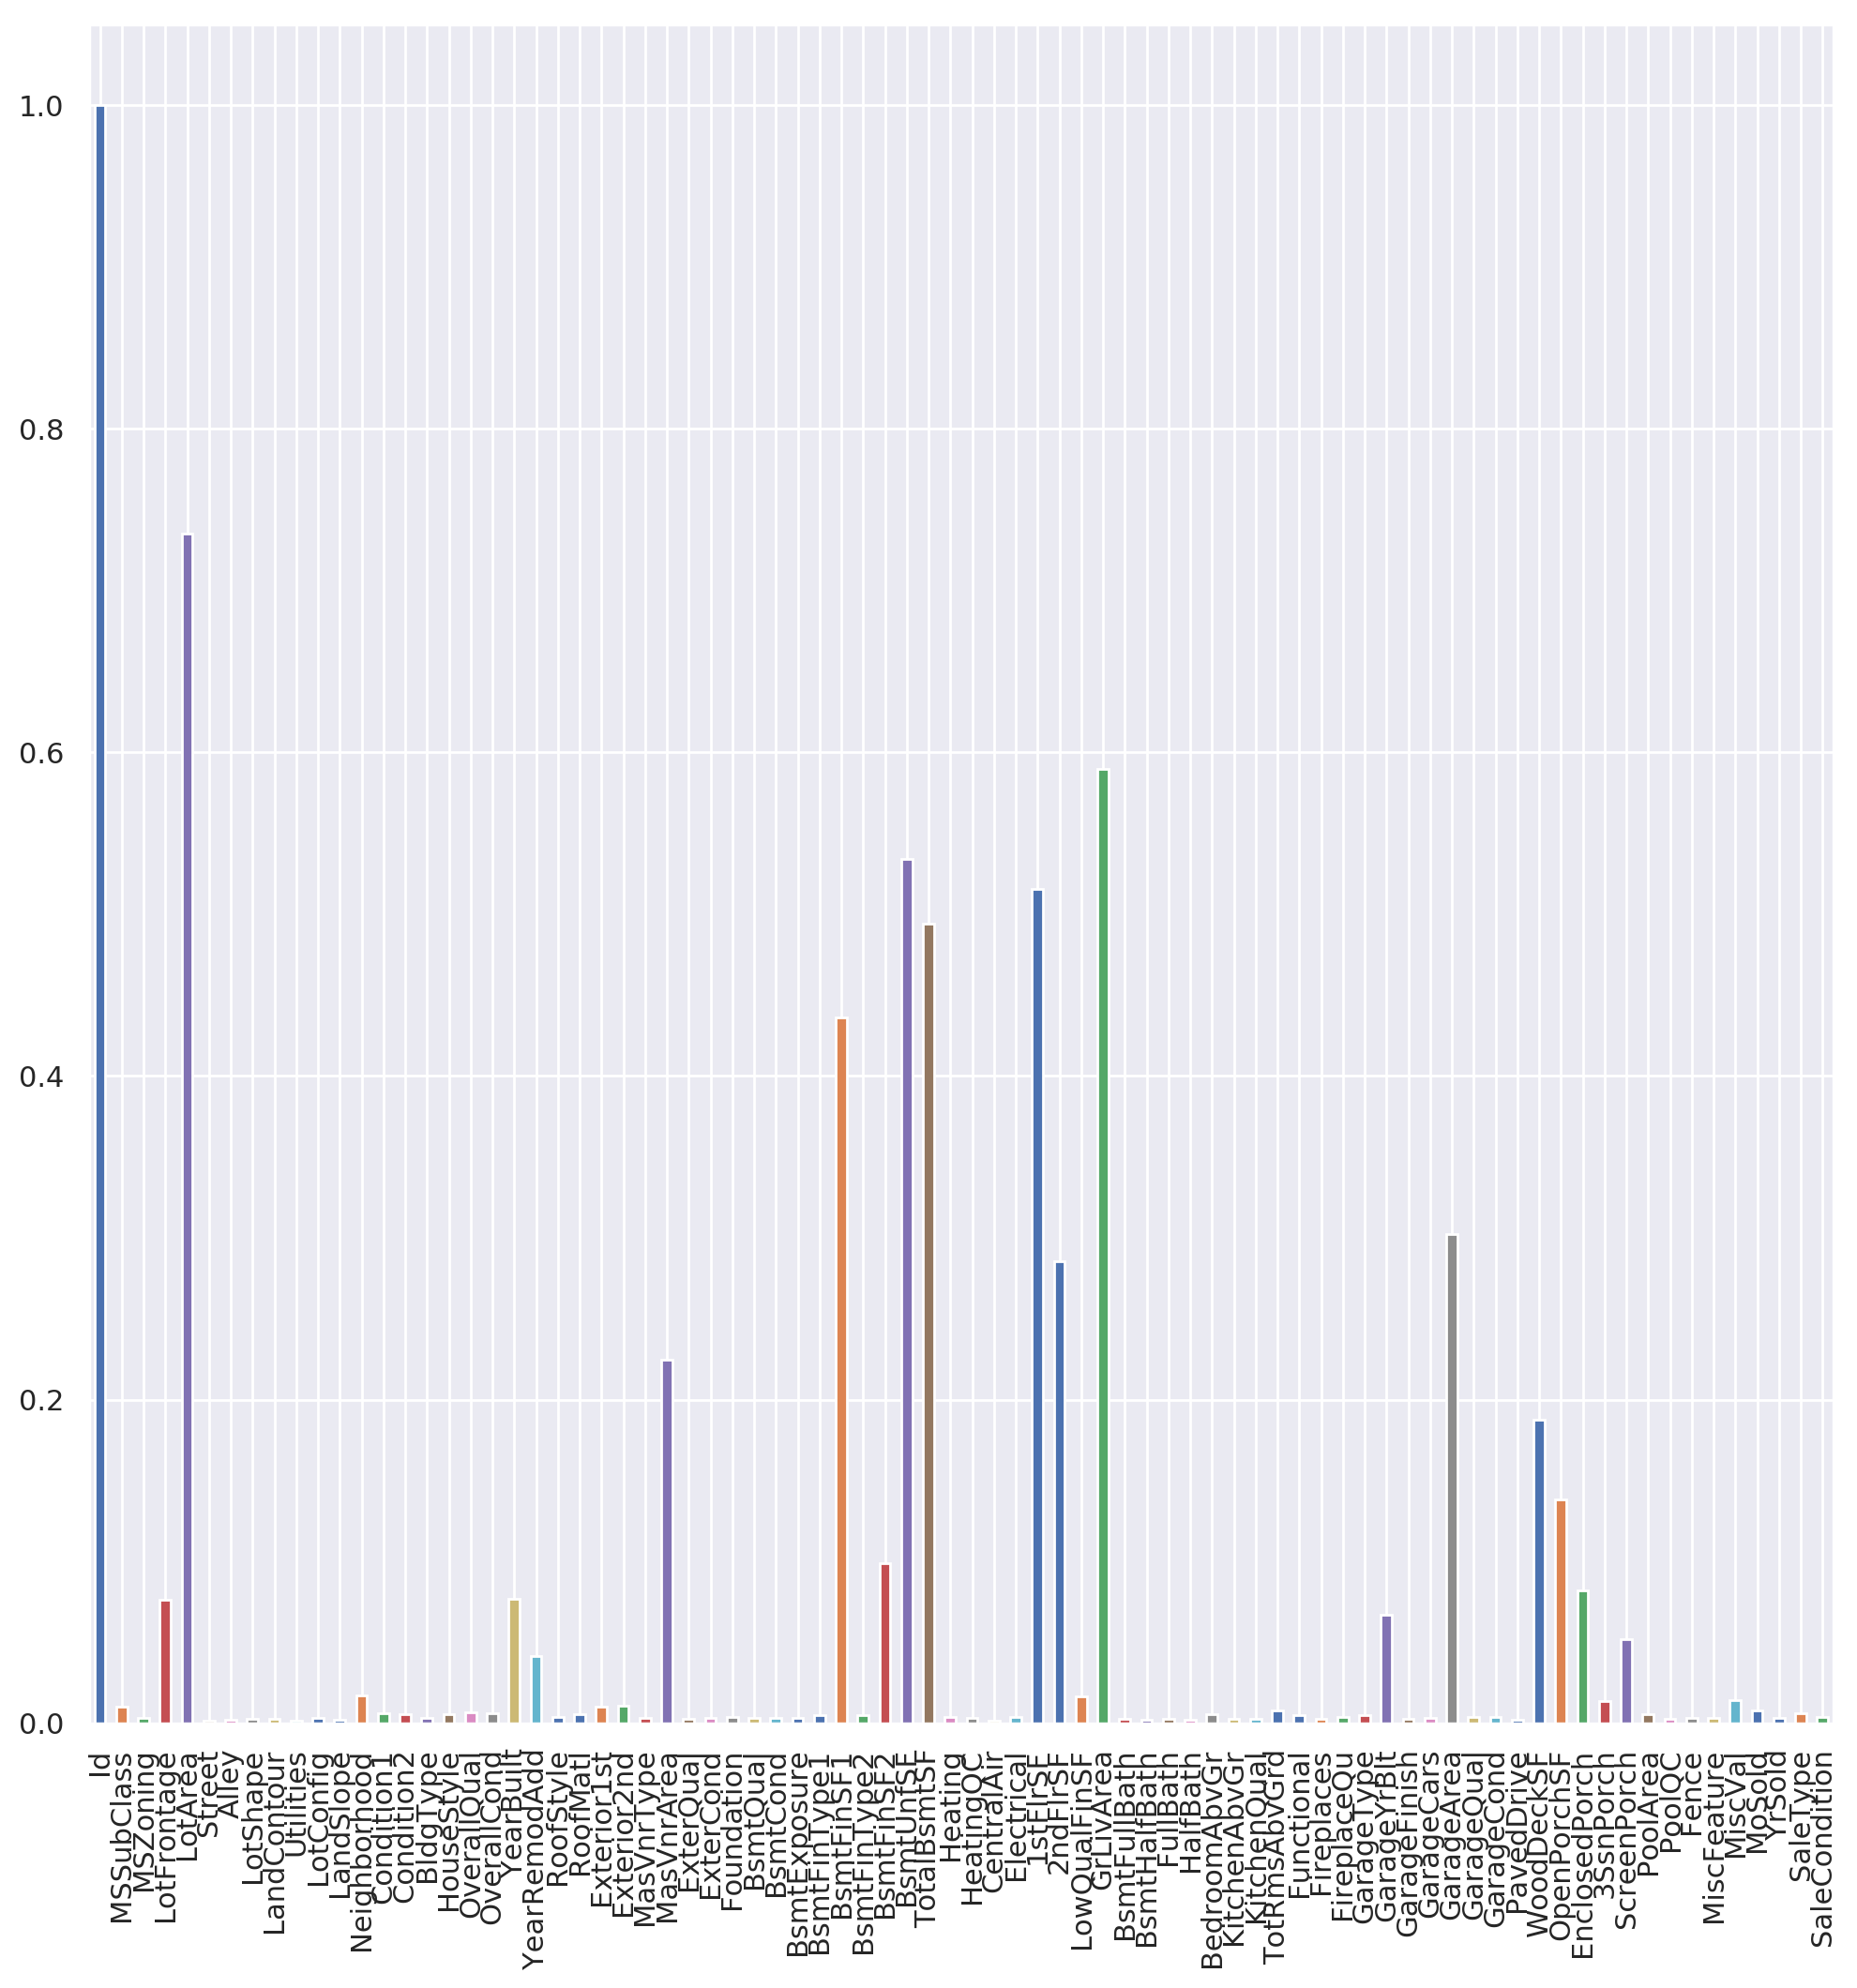

In [7]:
plt.figure(figsize=(12,12),dpi=200)  # 調整圖片尺寸
(df.apply(lambda x:x.unique().shape[0],axis=0)/df.shape[0]).plot(kind='bar');

In [8]:
# 空值數量
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond

In [9]:
# 空值欄位
df.loc[:,pd.Series(df.isnull().any())]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


# 資料清理

In [10]:
# 欄位補0或None
c = ["LotFrontage","GarageYrBlt"]
df[c] = df[c].fillna(0)

d = ["Alley","BsmtCond","BsmtQual","BsmtExposure","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond"]
df[d] = df[d].fillna('None')

In [11]:
# 特殊欄位補None 原意有值改1? 暫時不變原有資料測試
c = ["PoolQC","Fence"]
df[c] = df[c].fillna(0)

c = ["MiscFeature"]
df[c] = df[c].fillna('None')

In [12]:
# 用眾值填補空值
#["MasVnrType","MasVnrArea","Electrical"]
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna("0.0")
df["Electrical"] = df["Electrical"].fillna("SBrkr")

#df["MasVnrArea"].mode()  # 觀察眾值

# 觀察資料相依性

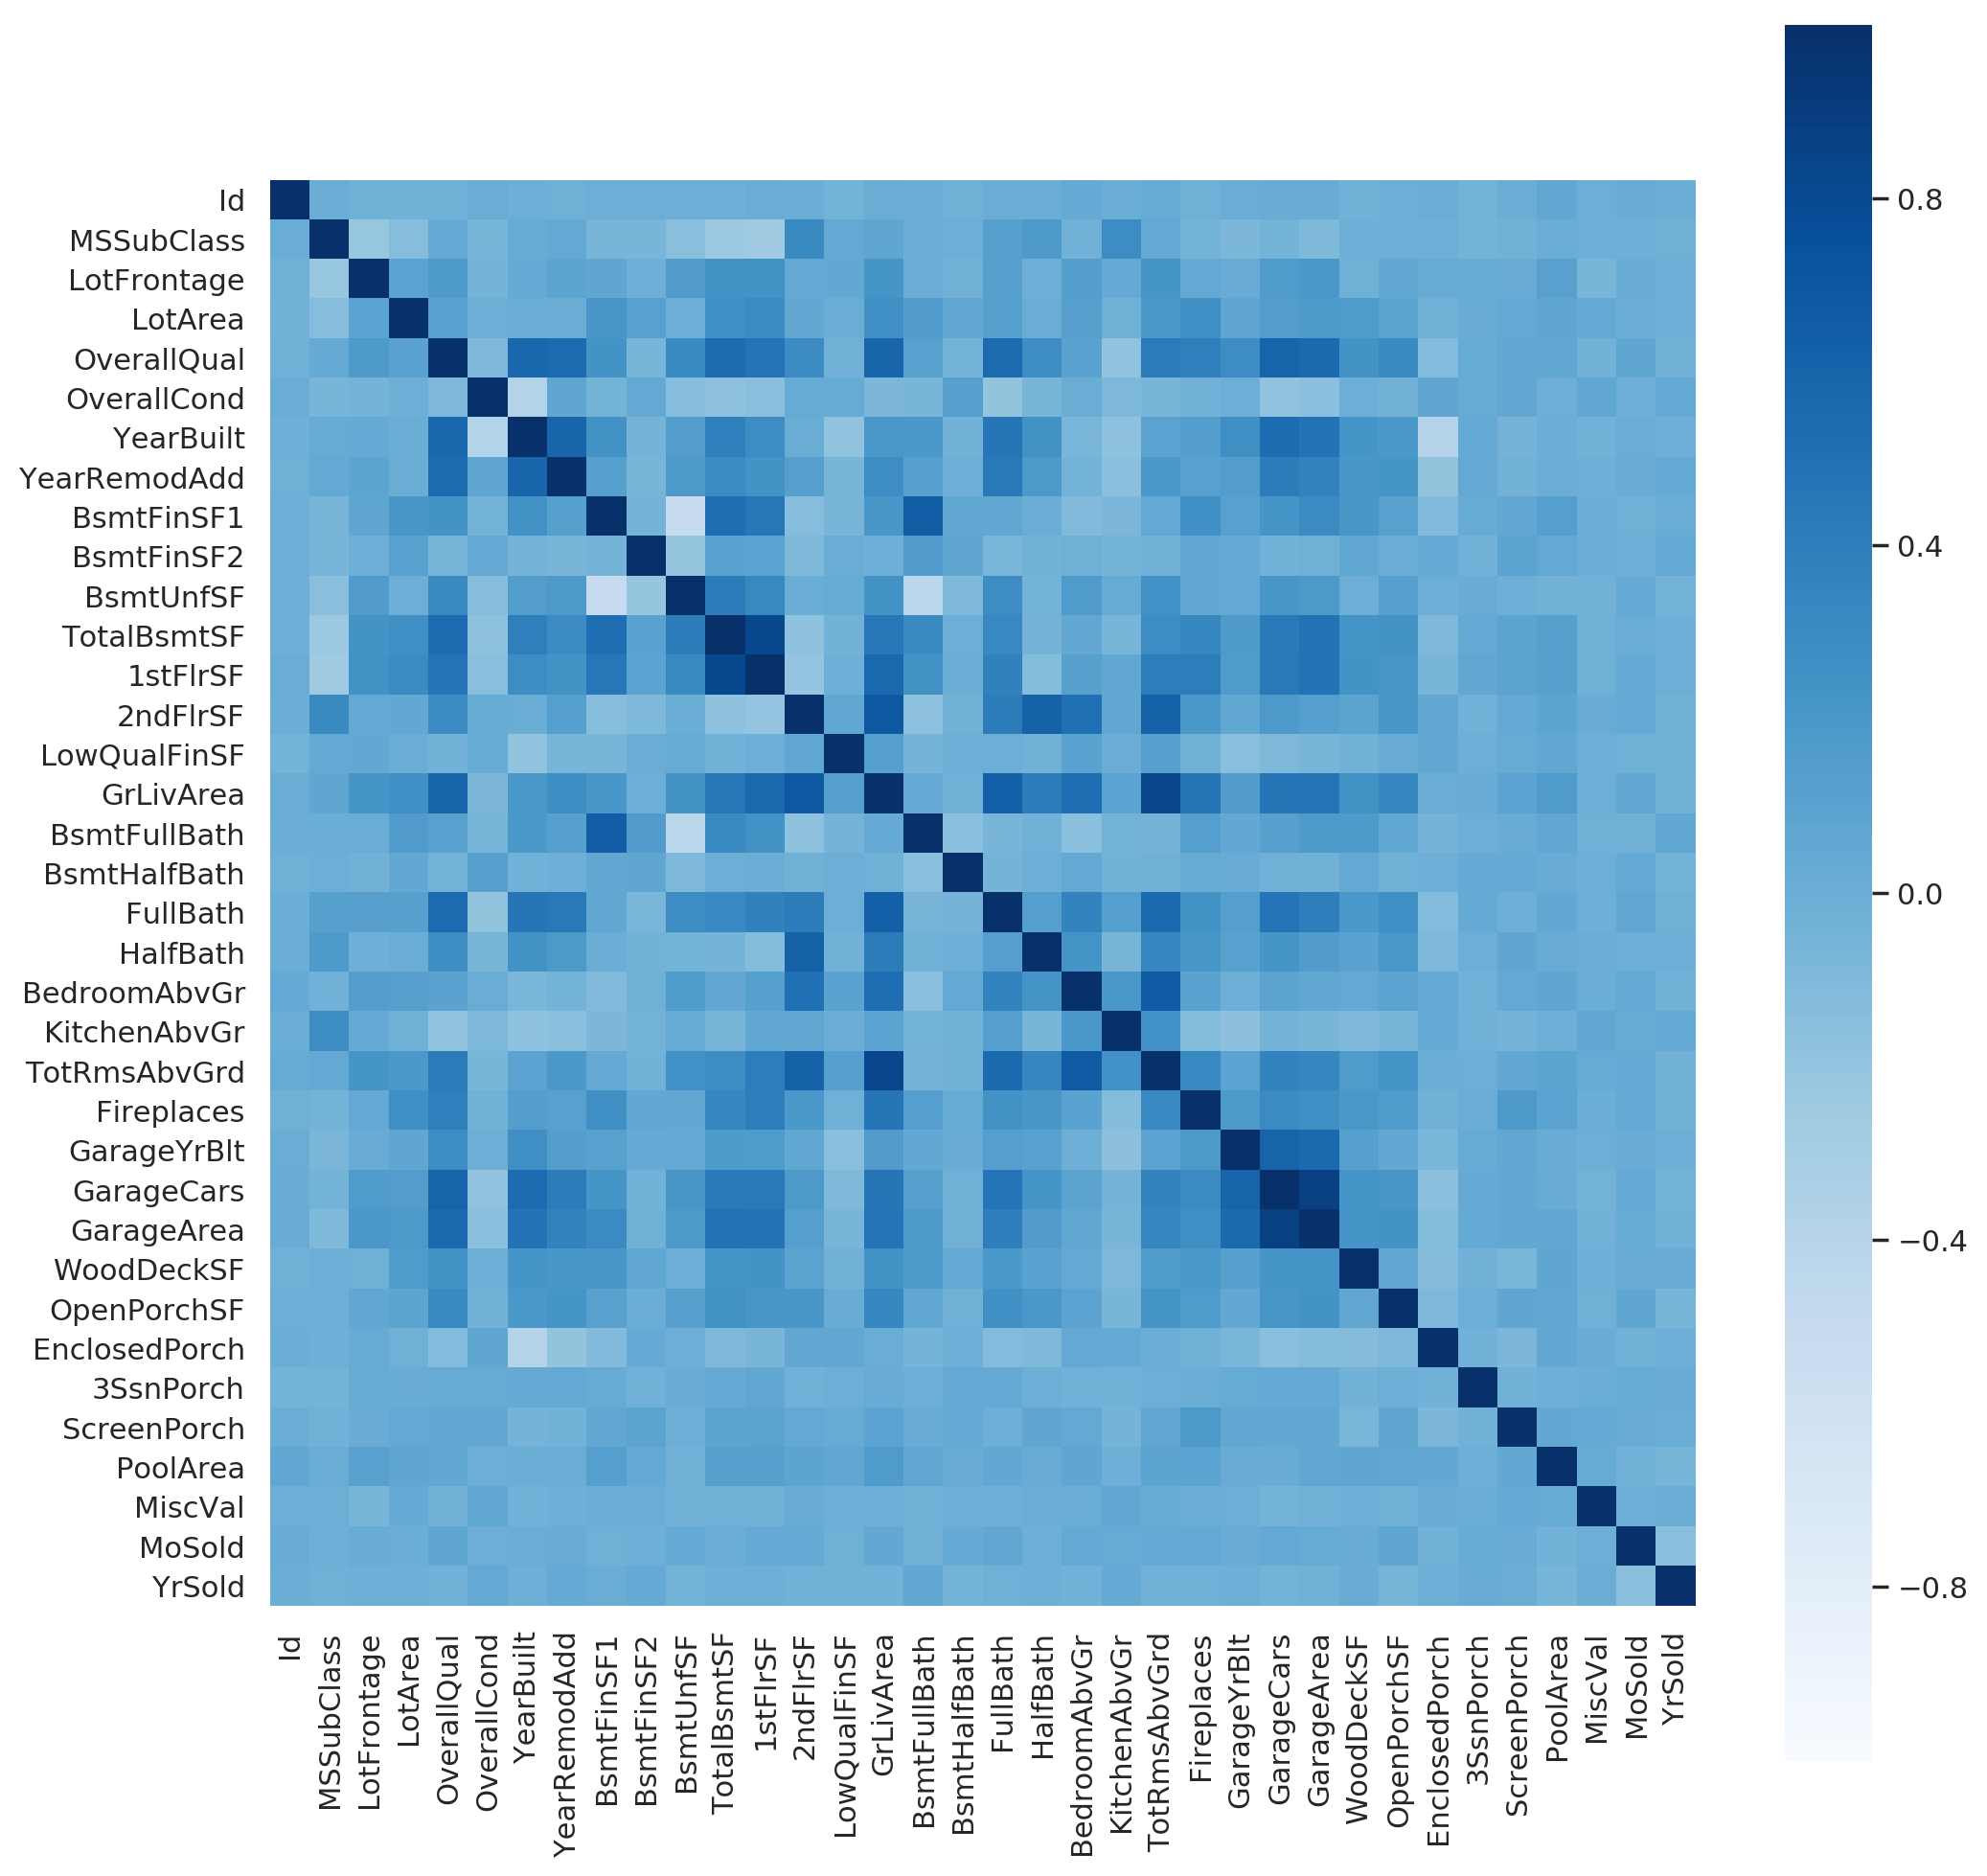

In [13]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap( df.corr(),cmap="Blues",   # color
             vmin=-1,                              # lower limit
             vmax=1,                               # upper liomit
             square=True,                       # square 
             annot=None)                        # block of number
plt.show()

# 類別型欄位轉數值

In [14]:
# 類別型數據編碼(one-hot encodeing)-1
#MSZoning_mapping = {MSZoning:idx for idx,MSZoning in enumerate(np.unique(df['MSZoning']))}
#print(MSZoning_mapping)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encodeing
le_MSZoning = LabelEncoder().fit(df["MSZoning"])
MSZoning_label = le_MSZoning.transform(df["MSZoning"])
ohe_MSZoning = OneHotEncoder(sparse=False).fit(MSZoning_label.reshape(-1,1))
MSZoning_ohe = ohe_MSZoning.transform(MSZoning_label.reshape(-1,1))

# 放回原資料
df["MSZoning_C"] = MSZoning_ohe[:,0]
df["MSZoning_FV"] = MSZoning_ohe[:,1]
df["MSZoning_RH"] = MSZoning_ohe[:,2]
df["MSZoning_RL"] = MSZoning_ohe[:,3]
df["MSZoning_RM"] = MSZoning_ohe[:,4]

# drop 原始欄位
df = df.drop(["MSZoning"], axis=1)

In [15]:
# 類別型數據編碼(one-hot encodeing)-2

le_Street = LabelEncoder().fit(df["Street"])
Street_label = le_Street.transform(df["Street"])
ohe_Street = OneHotEncoder(sparse=False).fit(Street_label.reshape(-1,1))
Street_ohe = ohe_Street.transform(Street_label.reshape(-1,1))
df["Street_Grvl"] = Street_ohe[:,0]
df["Street_Pave"] = Street_ohe[:,1]
df = df.drop(["Street"], axis=1)

In [16]:
# 類別型數據編碼(one-hot encodeing)-3

le_Alley = LabelEncoder().fit(df["Alley"])
Alley_label = le_Alley.transform(df["Alley"])
ohe_Alley = OneHotEncoder(sparse=False).fit(Alley_label.reshape(-1,1))
Alley_ohe = ohe_Alley.transform(Alley_label.reshape(-1,1))
df["Alley_Grvl"] = Alley_ohe[:,0]
df["Alley_None"] = Alley_ohe[:,1]
df["Alley_Pave"] = Alley_ohe[:,2]
df = df.drop(["Alley"], axis=1)

In [17]:
# 類別型數據編碼(one-hot encodeing)-4

le_LotShape = LabelEncoder().fit(df["LotShape"])
LotShape_label = le_LotShape.transform(df["LotShape"])
ohe_LotShape = OneHotEncoder(sparse=False).fit(LotShape_label.reshape(-1,1))
LotShape_ohe = ohe_LotShape.transform(LotShape_label.reshape(-1,1))
df["LotShape_IR1"] = LotShape_ohe[:,0]
df["LotShape_IR2"] = LotShape_ohe[:,1]
df["LotShape_IR3"] = LotShape_ohe[:,2]
df["LotShape_Reg"] = LotShape_ohe[:,3]
df = df.drop(["LotShape"], axis=1)

In [18]:
# 類別型數據編碼(one-hot encodeing)-5

le_LandContour = LabelEncoder().fit(df["LandContour"])
LandContour_label = le_LandContour.transform(df["LandContour"])
ohe_LandContour = OneHotEncoder(sparse=False).fit(LandContour_label.reshape(-1,1))
LandContour_ohe = ohe_LandContour.transform(LandContour_label.reshape(-1,1))
df["LandContour_Bnk"] = LandContour_ohe[:,0]
df["LandContour_HLS"] = LandContour_ohe[:,1]
df["LandContour_Low"] = LandContour_ohe[:,2]
df["LandContour_Lvl"] = LandContour_ohe[:,3]
df = df.drop(["LandContour"], axis=1)

In [19]:
# 類別型數據編碼(one-hot encodeing)-6

le_Utilities = LabelEncoder().fit(df["Utilities"])
Utilities_label = le_Utilities.transform(df["Utilities"])
ohe_Utilities = OneHotEncoder(sparse=False).fit(Utilities_label.reshape(-1,1))
Utilities_ohe = ohe_Utilities.transform(Utilities_label.reshape(-1,1))
df["Utilities_AllPub"] = Utilities_ohe[:,0]
df["Utilities_NoSeWa"] = Utilities_ohe[:,1]
df = df.drop(["Utilities"], axis=1)

In [20]:
# 類別型數據編碼(one-hot encodeing)-7

le_LotConfig = LabelEncoder().fit(df["LotConfig"])
LotConfig_label = le_LotConfig.transform(df["LotConfig"])
ohe_LotConfig = OneHotEncoder(sparse=False).fit(LotConfig_label.reshape(-1,1))
LotConfig_ohe = ohe_LotConfig.transform(LotConfig_label.reshape(-1,1))
df["LotConfig_Corner"] = LotConfig_ohe[:,0]
df["LotConfig_CulDSac"] = LotConfig_ohe[:,1]
df["LotConfig_FR2"] = LotConfig_ohe[:,2]
df["LotConfig_FR3"] = LotConfig_ohe[:,3]
df["LotConfig_Inside"] = LotConfig_ohe[:,4]
df = df.drop(["LotConfig"], axis=1)

In [21]:
# 類別型數據編碼(one-hot encodeing)-8

le_LandSlope = LabelEncoder().fit(df["LandSlope"])
LandSlope_label = le_LandSlope.transform(df["LandSlope"])
ohe_LandSlope = OneHotEncoder(sparse=False).fit(LandSlope_label.reshape(-1,1))
LandSlope_ohe = ohe_LandSlope.transform(LandSlope_label.reshape(-1,1))
df["LandSlope_Gtl"] = LandSlope_ohe[:,0]
df["LandSlope_Mod"] = LandSlope_ohe[:,1]
df["LandSlope_Sev"] = LandSlope_ohe[:,2]
df = df.drop(["LandSlope"], axis=1)

In [22]:
# 類別型數據編碼(one-hot encodeing)-9

le_Neighborhood = LabelEncoder().fit(df["Neighborhood"])
Neighborhood_label = le_Neighborhood.transform(df["Neighborhood"])
ohe_Neighborhood = OneHotEncoder(sparse=False).fit(Neighborhood_label.reshape(-1,1))
Neighborhood_ohe = ohe_Neighborhood.transform(Neighborhood_label.reshape(-1,1))
df["Neighborhood_Blmngtn"] = Neighborhood_ohe[:,0]
df["Neighborhood_Blueste"] = Neighborhood_ohe[:,1]
df["Neighborhood_BrDale"] = Neighborhood_ohe[:,2]
df["Neighborhood_BrkSide"] = Neighborhood_ohe[:,3]
df["Neighborhood_ClearCr"] = Neighborhood_ohe[:,4]
df["Neighborhood_CollgCr"] = Neighborhood_ohe[:,5]
df["Neighborhood_Crawfor"] = Neighborhood_ohe[:,6]
df["Neighborhood_Edwards"] = Neighborhood_ohe[:,7]
df["Neighborhood_Gilbert"] = Neighborhood_ohe[:,8]
df["Neighborhood_IDOTRR"] = Neighborhood_ohe[:,9]
df["Neighborhood_MeadowV"] = Neighborhood_ohe[:,10]
df["Neighborhood_Mitchel"] = Neighborhood_ohe[:,11]
df["Neighborhood_NAmes"] = Neighborhood_ohe[:,12]
df["Neighborhood_NPkVill"] = Neighborhood_ohe[:,13]
df["Neighborhood_NWAmes"] = Neighborhood_ohe[:,14]
df["Neighborhood_NoRidge"] = Neighborhood_ohe[:,15]
df["Neighborhood_NridgHt"] = Neighborhood_ohe[:,16]
df["Neighborhood_OldTown"] = Neighborhood_ohe[:,17]
df["Neighborhood_SWISU"] = Neighborhood_ohe[:,18]
df["Neighborhood_Sawyer"] = Neighborhood_ohe[:,19]
df["Neighborhood_SawyerW"] = Neighborhood_ohe[:,20]
df["Neighborhood_Somerst"] = Neighborhood_ohe[:,21]
df["Neighborhood_StoneBR"] = Neighborhood_ohe[:,22]
df["Neighborhood_Timber"] = Neighborhood_ohe[:,23]
df["Neighborhood_Veenker"] = Neighborhood_ohe[:,24]
df = df.drop(["Neighborhood"], axis=1)

In [23]:
# 類別型數據編碼(one-hot encodeing)-10

le_Condition1 = LabelEncoder().fit(df["Condition1"])
Condition1_label = le_Condition1.transform(df["Condition1"])
ohe_Condition1 = OneHotEncoder(sparse=False).fit(Condition1_label.reshape(-1,1))
Condition1_ohe = ohe_Condition1.transform(Condition1_label.reshape(-1,1))
df["Condition1_Artery"] = Condition1_ohe[:,0]
df["Condition1_Feedr"] = Condition1_ohe[:,1]
df["Condition1_Norm"] = Condition1_ohe[:,2]
df["Condition1_PosA"] = Condition1_ohe[:,3]
df["Condition1_PosN"] = Condition1_ohe[:,4]
df["Condition1_RRAe"] = Condition1_ohe[:,5]
df["Condition1_RRAn"] = Condition1_ohe[:,6]
df["Condition1_RRNe"] = Condition1_ohe[:,7]
df["Condition1_RRNn"] = Condition1_ohe[:,8]
df = df.drop(["Condition1"], axis=1)

In [24]:
# 類別型數據編碼(one-hot encodeing)-11

le_Condition2 = LabelEncoder().fit(df["Condition2"])
Condition2_label = le_Condition2.transform(df["Condition2"])
ohe_Condition2 = OneHotEncoder(sparse=False).fit(Condition2_label.reshape(-1,1))
Condition2_ohe = ohe_Condition2.transform(Condition2_label.reshape(-1,1))
df["Condition2_Artery"] = Condition2_ohe[:,0]
df["Condition2_Feedr"] = Condition2_ohe[:,1]
df["Condition2_Norm"] = Condition2_ohe[:,2]
df["Condition2_PosA"] = Condition2_ohe[:,3]
df["Condition2_PosN"] = Condition2_ohe[:,4]
df["Condition2_RRAe"] = Condition2_ohe[:,5]
df["Condition2_RRAn"] = Condition2_ohe[:,6]
df["Condition2_RRNn"] = Condition2_ohe[:,7]
df = df.drop(["Condition2"], axis=1)

In [25]:
# 類別型數據編碼(one-hot encodeing)-12

le_BldgType = LabelEncoder().fit(df["BldgType"])
BldgType_label = le_BldgType.transform(df["BldgType"])
ohe_BldgType = OneHotEncoder(sparse=False).fit(BldgType_label.reshape(-1,1))
BldgType_ohe = ohe_BldgType.transform(BldgType_label.reshape(-1,1))
df["BldgType_Artery"] = BldgType_ohe[:,0]
df["BldgType_Feedr"] = BldgType_ohe[:,1]
df["BldgType_Norm"] = BldgType_ohe[:,2]
df["BldgType_PosA"] = BldgType_ohe[:,3]
df["BldgType_PosN"] = BldgType_ohe[:,4]
df = df.drop(["BldgType"], axis=1)

In [26]:
# 類別型數據編碼(one-hot encodeing)-13

le_HouseStyle = LabelEncoder().fit(df["HouseStyle"])
HouseStyle_label = le_HouseStyle.transform(df["HouseStyle"])
ohe_HouseStyle = OneHotEncoder(sparse=False).fit(HouseStyle_label.reshape(-1,1))
HouseStyle_ohe = ohe_HouseStyle.transform(HouseStyle_label.reshape(-1,1))
df["HouseStyle_Artery"] = HouseStyle_ohe[:,0]
df["HouseStyle_Feedr"] = HouseStyle_ohe[:,1]
df["HouseStyle_Norm"] = HouseStyle_ohe[:,2]
df["HouseStyle_PosA"] = HouseStyle_ohe[:,3]
df["HouseStyle_PosN"] = HouseStyle_ohe[:,4]
df["HouseStyle_2Story"] = HouseStyle_ohe[:,5]
df["HouseStyle_SFoyer"] = HouseStyle_ohe[:,6]
df["HouseStyle_SLvl"] = HouseStyle_ohe[:,7]
df = df.drop(["HouseStyle"], axis=1)

In [27]:
# 類別型數據編碼(one-hot encodeing)-14

le_RoofStyle = LabelEncoder().fit(df["RoofStyle"])
RoofStyle_label = le_RoofStyle.transform(df["RoofStyle"])
ohe_RoofStyle = OneHotEncoder(sparse=False).fit(RoofStyle_label.reshape(-1,1))
RoofStyle_ohe = ohe_RoofStyle.transform(RoofStyle_label.reshape(-1,1))
df["RoofStyle_Flat"] = RoofStyle_ohe[:,0]
df["RoofStyle_Gable"] = RoofStyle_ohe[:,1]
df["RoofStyle_Gambrel"] = RoofStyle_ohe[:,2]
df["RoofStyle_Hip"] = RoofStyle_ohe[:,3]
df["RoofStyle_Mansard"] = RoofStyle_ohe[:,4]
df["RoofStyle_Shed"] = RoofStyle_ohe[:,5]
df = df.drop(["RoofStyle"], axis=1)

In [28]:
# 類別型數據編碼(one-hot encodeing)-15

le_RoofMatl = LabelEncoder().fit(df["RoofMatl"])
RoofMatl_label = le_RoofMatl.transform(df["RoofMatl"])
ohe_RoofMatl = OneHotEncoder(sparse=False).fit(RoofMatl_label.reshape(-1,1))
RoofMatl_ohe = ohe_RoofMatl.transform(RoofMatl_label.reshape(-1,1))
df["RoofMatl_ClyTile"] = RoofMatl_ohe[:,0]
df["RoofMatl_CompShg"] = RoofMatl_ohe[:,1]
df["RoofMatl_Membran"] = RoofMatl_ohe[:,2]
df["RoofMatl_Metal"] = RoofMatl_ohe[:,3]
df["RoofMatl_Roll"] = RoofMatl_ohe[:,4]
df["RoofMatl_Tar&Grv"] = RoofMatl_ohe[:,5]
df["RoofMatl_WdShake"] = RoofMatl_ohe[:,6]
df["RoofMatl_WdShngl"] = RoofMatl_ohe[:,7]
df = df.drop(["RoofMatl"], axis=1)

In [29]:
# 類別型數據編碼(one-hot encodeing)-16

le_Exterior1st = LabelEncoder().fit(df["Exterior1st"])
Exterior1st_label = le_Exterior1st.transform(df["Exterior1st"])
ohe_Exterior1st = OneHotEncoder(sparse=False).fit(Exterior1st_label.reshape(-1,1))
Exterior1st_ohe = ohe_Exterior1st.transform(Exterior1st_label.reshape(-1,1))
df["Exterior1st_AsbShng"] = Exterior1st_ohe[:,0]
df["Exterior1st_AsphShn"] = Exterior1st_ohe[:,1]
df["Exterior1st_BrkComm"] = Exterior1st_ohe[:,2]
df["Exterior1st_BrkFace"] = Exterior1st_ohe[:,3]
df["Exterior1st_CBlock"] = Exterior1st_ohe[:,4]
df["Exterior1st_CemntBd"] = Exterior1st_ohe[:,5]
df["Exterior1st_HdBoard"] = Exterior1st_ohe[:,6]
df["Exterior1st_ImStucc"] = Exterior1st_ohe[:,7]
df["Exterior1st_MetalSd"] = Exterior1st_ohe[:,8]
df["Exterior1st_Plywood"] = Exterior1st_ohe[:,9]
df["Exterior1st_Stone"] = Exterior1st_ohe[:,10]
df["Exterior1st_Stucco"] = Exterior1st_ohe[:,11]
df["Exterior1st_VinylSd"] = Exterior1st_ohe[:,12]
df["Exterior1st_Wd Sdng"] = Exterior1st_ohe[:,13]
df["Exterior1st_WdShing"] = Exterior1st_ohe[:,14]
df = df.drop(["Exterior1st"], axis=1)

In [30]:
# 類別型數據編碼(one-hot encodeing)-17

le_Exterior2nd = LabelEncoder().fit(df["Exterior2nd"])
Exterior2nd_label = le_Exterior2nd.transform(df["Exterior2nd"])
ohe_Exterior2nd = OneHotEncoder(sparse=False).fit(Exterior2nd_label.reshape(-1,1))
Exterior2nd_ohe = ohe_Exterior2nd.transform(Exterior2nd_label.reshape(-1,1))
df["Exterior2nd_AsbShng"] = Exterior2nd_ohe[:,0]
df["Exterior2nd_AsphShn"] = Exterior2nd_ohe[:,1]
df["Exterior2nd_Brk Cmn"] = Exterior2nd_ohe[:,2]
df["Exterior2nd_BrkFace"] = Exterior2nd_ohe[:,3]
df["Exterior2nd_CBlock"] = Exterior2nd_ohe[:,4]
df["Exterior2nd_CmentBd"] = Exterior2nd_ohe[:,5]
df["Exterior2nd_HdBoard"] = Exterior2nd_ohe[:,6]
df["Exterior2nd_ImStucc"] = Exterior2nd_ohe[:,7]
df["Exterior2nd_MetalSd"] = Exterior2nd_ohe[:,8]
df["Exterior2nd_Other"] = Exterior2nd_ohe[:,9]
df["Exterior2nd_Plywood"] = Exterior2nd_ohe[:,10]
df["Exterior2nd_Stone"] = Exterior2nd_ohe[:,11]
df["Exterior2nd_Stucco"] = Exterior2nd_ohe[:,12]
df["Exterior2nd_VinylSd"] = Exterior2nd_ohe[:,13]
df["Exterior2nd_Wd Sdng"] = Exterior2nd_ohe[:,14]
df["Exterior2nd_Wd Shng"] = Exterior2nd_ohe[:,15]
df = df.drop(["Exterior2nd"], axis=1)

In [31]:
# 類別型數據編碼(one-hot encodeing)-18

le_MasVnrType = LabelEncoder().fit(df["MasVnrType"])
MasVnrType_label = le_MasVnrType.transform(df["MasVnrType"])
ohe_MasVnrType = OneHotEncoder(sparse=False).fit(MasVnrType_label.reshape(-1,1))
MasVnrType_ohe = ohe_MasVnrType.transform(MasVnrType_label.reshape(-1,1))
df["MasVnrType_AsbShng"] = MasVnrType_ohe[:,0]
df["MasVnrType_BrkFace"] = MasVnrType_ohe[:,1]
df["MasVnrType_None"] = MasVnrType_ohe[:,2]
df["MasVnrType_Stone"] = MasVnrType_ohe[:,3]
df = df.drop(["MasVnrType"], axis=1)

In [32]:
# 類別型數據編碼(有序)-19

ExterQual_mapping = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["ExterQual"]=df["ExterQual"].map(ExterQual_mapping)

In [33]:
# 類別型數據編碼(有序)-20

ExterCond_mapping = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["ExterCond"]=df["ExterCond"].map(ExterCond_mapping)

In [34]:
# 類別型數據編碼(one-hot encodeing)-21

le_Foundation = LabelEncoder().fit(df["Foundation"])
Foundation_label = le_Foundation.transform(df["Foundation"])
ohe_Foundation = OneHotEncoder(sparse=False).fit(Foundation_label.reshape(-1,1))
Foundation_ohe = ohe_Foundation.transform(Foundation_label.reshape(-1,1))
df["Foundation_BrkTil"] = Foundation_ohe[:,0]
df["Foundation_CBlock"] = Foundation_ohe[:,1]
df["Foundation_PConc"] = Foundation_ohe[:,2]
df["Foundation_Slab"] = Foundation_ohe[:,3]
df["Foundation_Stone"] = Foundation_ohe[:,4]
df["Foundation_Wood"] = Foundation_ohe[:,5]
df = df.drop(["Foundation"], axis=1)

In [35]:
# 類別型數據編碼(有序)-22

BsmtQual_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["BsmtQual"]=df["BsmtQual"].map(BsmtQual_mapping)

In [36]:
# 類別型數據編碼(有序)-23

BsmtCond_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["BsmtCond"]=df["BsmtCond"].map(BsmtCond_mapping)

In [37]:
# 類別型數據編碼(有序)-24

BsmtExposure_mapping = {"NA":0,"No":1,"Mn":2,"Av":3,"Gd":4}
df["BsmtExposure"]=df["BsmtExposure"].map(BsmtExposure_mapping)

In [38]:
# 類別型數據編碼(有序)-25

BsmtFinType1_mapping = {"NA":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}
df["BsmtFinType1"]=df["BsmtFinType1"].map(BsmtFinType1_mapping)

In [39]:
# 類別型數據編碼(有序)-26

BsmtFinType2_mapping = {"NA":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}
df["BsmtFinType2"]=df["BsmtFinType2"].map(BsmtFinType2_mapping)

In [40]:
# 類別型數據編碼(one-hot encodeing)-27

le_Heating = LabelEncoder().fit(df["Heating"])
Heating_label = le_Heating.transform(df["Heating"])
ohe_Heating = OneHotEncoder(sparse=False).fit(Heating_label.reshape(-1,1))
Heating_ohe = ohe_Heating.transform(Heating_label.reshape(-1,1))
df["Heating_Floor"] = Heating_ohe[:,0]
df["Heating_GasA"] = Heating_ohe[:,1]
df["Heating_GasW"] = Heating_ohe[:,2]
df["Heating_Grav"] = Heating_ohe[:,3]
df["Heating_OthW"] = Heating_ohe[:,4]
df["Heating_Wall"] = Heating_ohe[:,5]
df = df.drop(["Heating"], axis=1)

In [41]:
# 類別型數據編碼(有序)-28

HeatingQC_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["HeatingQC"]=df["HeatingQC"].map(HeatingQC_mapping)

In [42]:
# 類別型數據編碼(有序)-29

CentralAir_mapping = {"N":0,"Y":1}
df["CentralAir"]=df["CentralAir"].map(CentralAir_mapping)

In [43]:
# 類別型數據編碼(one-hot encodeing)-30

le_Electrical = LabelEncoder().fit(df["Electrical"])
Electrical_label = le_Electrical.transform(df["Electrical"])
ohe_Electrical = OneHotEncoder(sparse=False).fit(Electrical_label.reshape(-1,1))
Electrical_ohe = ohe_Electrical.transform(Electrical_label.reshape(-1,1))
df["Electrical_FuseA"] = Electrical_ohe[:,0]
df["Electrical_FuseF"] = Electrical_ohe[:,1]
df["Electrical_FuseP"] = Electrical_ohe[:,2]
df["Electrical_Mix"] = Electrical_ohe[:,3]
df["Electrical_SBrkr"] = Electrical_ohe[:,4]
df = df.drop(["Electrical"], axis=1)

In [44]:
# 類別型數據編碼(有序)-31

KitchenQual_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["KitchenQual"]=df["KitchenQual"].map(KitchenQual_mapping)

In [45]:
# 類別型數據編碼(one-hot encodeing)-32

le_Functional = LabelEncoder().fit(df["Functional"])
Functional_label = le_Functional.transform(df["Functional"])
ohe_Functional = OneHotEncoder(sparse=False).fit(Functional_label.reshape(-1,1))
Functional_ohe = ohe_Functional.transform(Functional_label.reshape(-1,1))
df["Functional_Maj1"] = Functional_ohe[:,0]
df["Functional_Maj2"] = Functional_ohe[:,1]
df["Functional_Min1"] = Functional_ohe[:,2]
df["Functional_Min2"] = Functional_ohe[:,3]
df["Functional_Mod"] = Functional_ohe[:,4]
df["Functional_Sev"] = Functional_ohe[:,5]
df["Functional_Typ"] = Functional_ohe[:,6]
df = df.drop(["Functional"], axis=1)

In [46]:
# 類別型數據編碼(有序)-33

FireplaceQu_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["FireplaceQu"]=df["FireplaceQu"].map(FireplaceQu_mapping)

In [47]:
# 類別型數據編碼(one-hot encodeing)-34

le_GarageType = LabelEncoder().fit(df["GarageType"])
GarageType_label = le_GarageType.transform(df["GarageType"])
ohe_GarageType = OneHotEncoder(sparse=False).fit(GarageType_label.reshape(-1,1))
GarageType_ohe = ohe_GarageType.transform(GarageType_label.reshape(-1,1))
df["GarageType_2Types"] = GarageType_ohe[:,0]
df["GarageType_Attchd"] = GarageType_ohe[:,1]
df["GarageType_Basment"] = GarageType_ohe[:,2]
df["GarageType_BuiltIn"] = GarageType_ohe[:,3]
df["GarageType_CarPort"] = GarageType_ohe[:,4]
df["GarageType_Detchd"] = GarageType_ohe[:,5]
df["GarageType_None"] = GarageType_ohe[:,6]
df = df.drop(["GarageType"], axis=1)

In [48]:
# 類別型數據編碼(有序)-35

GarageFinish_mapping = {"NA":0,"Unf":1,"RFn":2,"Fin":3}
df["GarageFinish"]=df["GarageFinish"].map(GarageFinish_mapping)

In [49]:
# 類別型數據編碼(有序)-36

GarageQual_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["GarageQual"]=df["GarageQual"].map(GarageQual_mapping)

In [50]:
# 類別型數據編碼(有序)-37

GarageCond_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df["GarageCond"]=df["GarageCond"].map(GarageCond_mapping)

In [51]:
# 類別型數據編碼(one-hot encodeing)-38

le_PavedDrive = LabelEncoder().fit(df["PavedDrive"])
PavedDrive_label = le_PavedDrive.transform(df["PavedDrive"])
ohe_PavedDrive = OneHotEncoder(sparse=False).fit(PavedDrive_label.reshape(-1,1))
PavedDrive_ohe = ohe_PavedDrive.transform(PavedDrive_label.reshape(-1,1))
df["PavedDrive_N"] = PavedDrive_ohe[:,0]
df["PavedDrive_P"] = PavedDrive_ohe[:,1]
df["PavedDrive_Y"] = PavedDrive_ohe[:,2]
df = df.drop(["PavedDrive"], axis=1)

In [52]:
# 類別型數據編碼(有序)-39

PoolQC_mapping = {"NA":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}
df["PoolQC"]=df["PoolQC"].map(PoolQC_mapping)

In [53]:
# 類別型數據編碼(有序)-40

Fence_mapping = {"NA":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}
df["Fence"]=df["Fence"].map(Fence_mapping)

In [54]:
# 類別型數據編碼(one-hot encodeing)-41

le_MiscFeature = LabelEncoder().fit(df["MiscFeature"])
MiscFeature_label = le_MiscFeature.transform(df["MiscFeature"])
ohe_MiscFeature = OneHotEncoder(sparse=False).fit(MiscFeature_label.reshape(-1,1))
MiscFeature_ohe = ohe_MiscFeature.transform(MiscFeature_label.reshape(-1,1))
df["MiscFeature_Gar2"] = MiscFeature_ohe[:,0]
df["MiscFeature_None"] = MiscFeature_ohe[:,1]
df["MiscFeature_Othr"] = MiscFeature_ohe[:,2]
df["MiscFeature_Shed"] = MiscFeature_ohe[:,3]
df["MiscFeature_TenC"] = MiscFeature_ohe[:,4]
#df["MiscFeature_TenC"] = 0 # test.csv
df = df.drop(["MiscFeature"], axis=1)

In [55]:
# 類別型數據編碼(one-hot encodeing)-42

le_SaleType = LabelEncoder().fit(df["SaleType"])
SaleType_label = le_SaleType.transform(df["SaleType"])
ohe_SaleType = OneHotEncoder(sparse=False).fit(SaleType_label.reshape(-1,1))
SaleType_ohe = ohe_SaleType.transform(SaleType_label.reshape(-1,1))
df["SaleType_COD"] = SaleType_ohe[:,0]
df["SaleType_CWD"] = SaleType_ohe[:,1]
df["SaleType_Con"] = SaleType_ohe[:,2]
df["SaleType_ConLD"] = SaleType_ohe[:,3]
df["SaleType_ConLI"] = SaleType_ohe[:,4]
df["SaleType_ConLw"] = SaleType_ohe[:,5]
df["SaleType_New"] = SaleType_ohe[:,6]
df["SaleType_Oth"] = SaleType_ohe[:,7]
df["SaleType_WD"] = SaleType_ohe[:,8]
df = df.drop(["SaleType"], axis=1)

In [56]:
# 類別型數據編碼(one-hot encodeing)-43

le_SaleCondition = LabelEncoder().fit(df["SaleCondition"])
SaleCondition_label = le_SaleCondition.transform(df["SaleCondition"])
ohe_SaleCondition = OneHotEncoder(sparse=False).fit(SaleCondition_label.reshape(-1,1))
SaleCondition_ohe = ohe_SaleCondition.transform(SaleCondition_label.reshape(-1,1))
df["SaleCondition_Abnorml"] = SaleCondition_ohe[:,0]
df["SaleCondition_AdjLand"] = SaleCondition_ohe[:,1]
df["SaleCondition_Alloca"] = SaleCondition_ohe[:,2]
df["SaleCondition_Family"] = SaleCondition_ohe[:,3]
df["SaleCondition_Normal"] = SaleCondition_ohe[:,4]
df["SaleCondition_Partial"] = SaleCondition_ohe[:,5]
df = df.drop(["SaleCondition"], axis=1)

In [57]:
# 欄位補0或None
d = ["BsmtCond","BsmtQual","BsmtExposure","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PoolQC","Fence"]
df[d] = df[d].fillna(0)

In [58]:
# 切割訓練 測試資料
from sklearn.model_selection import train_test_split

x = df.iloc[:, 1:].values  ## 原始資料
y = dfTrain['SalePrice'].values  ## 原始資料
    
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [59]:
assert train_x.shape[0] == train_y.shape[0],"error, check my data!"

In [60]:
# 資料標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
# 觀察標準化結果
np.mean(train_x), np.std(train_x)  

(-1.056308495662041e-16, 0.9873144969898819)

# Scikit-learn: Ridge Regression

In [62]:
# 建模
from sklearn.linear_model import Ridge

regressor = Ridge(max_iter=1000000)
model_Ridge = regressor.fit(train_x,train_y)

In [63]:
# 預測
from sklearn.metrics import r2_score
pred_y = model_Ridge.predict(test_x)
r2_score(test_y,pred_y)

0.5220321027496857

# Scikit-learn: Lasso Regression

In [64]:
# 建模
from sklearn.linear_model import Lasso

regressor = Lasso(max_iter=1000000)
model_Lasso = regressor.fit(train_x,train_y)

In [65]:
# 預測
#from sklearn.metrics import r2_score
pred_y = model_Lasso.predict(test_x)
r2_score(test_y,pred_y)

0.476814421932231

# Scikit-learn: Elastic Net Regression

In [66]:
# 建模
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(max_iter=1000000)
model_ElasticNet = regressor.fit(train_x,train_y)

In [67]:
# 預測
#from sklearn.metrics import r2_score
pred_y = model_ElasticNet.predict(test_x)
r2_score(test_y,pred_y)

0.6080066313634881

# Scikit-learn: 樹演算法(資料不進行標準化)

In [68]:
# 建模
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier(criterion='entropy',   # 預設為gini  #entropy
                                   splitter='best',                       # 預設為best  #random
                                   max_depth=13,                     # 樹的深度
                                   min_samples_split=2,             # 分解節點時，最少樣本數 
                                   min_samples_leaf=1,              # 每個節點最少樣本數
                                   #min_weight_fraction_leaf=0.0, # 每個樣本的權重
                                   #max_features=None,             
                                   random_state=0,
                                   #max_leaf_nodes=None,           # 以雜質相對少的方式種樹，None代表無限制
                                   #min_impurity_decrease=0.0,      # 如果分裂將使雜質減少，則分裂節點
                                   #min_impurity_split=None,          # 樹木早期生長的門檻 以前一個參數為主
                                   class_weight=None,          # 權重形式 'balanced' 或 None
                                   presort=False)                         # 是否預先分配數據，加快最佳分裂的發現
model_DTC = regressor.fit(train_x,train_y)

In [69]:
# 預測
from sklearn.metrics import r2_score
pred_y = model_DTC.predict(test_x)
r2_score(test_y,pred_y)

0.49718459746076327

In [70]:
# 觀察屬性值重要性，值越大越重要
print(model_DTC.feature_importances_)

[0.00434103 0.02957606 0.06468564 0.11028968 0.0036934  0.02315043
 0.03837326 0.01183974 0.00100847 0.00328628 0.00372911 0.00068334
 0.02125294 0.01578418 0.09167483 0.00101587 0.00105293 0.0211024
 0.04191214 0.01345692 0.         0.03865774 0.01674869 0.
 0.06833599 0.00191959 0.         0.00153863 0.00268891 0.00446703
 0.00045556 0.00131085 0.02286793 0.00597054 0.00131085 0.02176027
 0.03756194 0.         0.09119417 0.00078069 0.         0.01998982
 0.01840115 0.00233546 0.00022778 0.00078069 0.         0.00022778
 0.00405375 0.         0.01699325 0.00828082 0.00022778 0.
 0.         0.0009971  0.00232954 0.         0.         0.00022778
 0.00022778 0.00062751 0.00100847 0.00022778 0.         0.00864093
 0.         0.         0.00022778 0.00171058 0.         0.
 0.00045556 0.         0.         0.         0.0066384  0.00118042
 0.         0.         0.         0.         0.         0.00045556
 0.         0.00217752 0.00022778 0.00054154 0.         0.00100847
 0.         0.      

## 解釋：為何樹的演算法可以做回歸？

# Random Forest regression 隨機森林(資料不進行標準化)

In [71]:
# 建模
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=150,    # 樹的數量
                                   criterion='entropy',                       # 預設為'gini'  'entropy'
                                   #max_depth=None,                   # 預設為None 無限制
                                   #min_samples_split=2,
                                   #min_samples_leaf=1,
                                   #min_weight_fraction_leaf=0.0,
                                   max_features='auto',                 # 尋找最佳分割所考慮的功能 'auto' 'sqrt' 'log2' 'None' int float
                                   #max_leaf_nodes=None,
                                   #min_impurity_decrease=0.0,
                                   #min_impurity_split=None,
                                   bootstrap=False,                      # 種樹時是否使用 bootstrap 的樣本
                                   #oob_score=False,
                                   n_jobs=-1,                               # 最大工作數 -1代表使用全部的處理器
                                   random_state=3,
                                   #verbose=0,                              # 在擬合和預設時顯示控制詳細程度 (只是顯示步驟而已 對預測確率沒幫助)
                                   warm_start=False,                   # 設為True時，是以補充隨機森林模型的方式運算
                                   class_weight='balanced')                 # 'None' 'balanced' 'balanced_subsample'
%time model_RFC = regressor.fit(train_x,train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


CPU times: user 4.76 s, sys: 559 ms, total: 5.32 s
Wall time: 5.41 s


In [72]:
# 預測
#from sklearn.metrics import r2_score
pred_y = model_RFC.predict(test_x)
%time r2_score(test_y,pred_y)

CPU times: user 168 µs, sys: 16 µs, total: 184 µs
Wall time: 188 µs


0.707600896130484

# 隨機森林的特徵選取

 1) GrLivArea                      0.042318
 2) TotalBsmtSF                    0.040419
 3) GarageArea                     0.036709
 4) YearBuilt                      0.036517
 5) 1stFlrSF                       0.036399
 6) LotArea                        0.036209
 7) BsmtUnfSF                      0.035791
 8) GarageYrBlt                    0.035502
 9) BsmtFinSF1                     0.031598
10) LotFrontage                    0.030146
11) YearRemodAdd                   0.029530
12) OpenPorchSF                    0.027123
13) OverallQual                    0.025482
14) TotRmsAbvGrd                   0.024452
15) MoSold                         0.020436
16) YrSold                         0.019754
17) WoodDeckSF                     0.019700
18) 2ndFlrSF                       0.018573
19) MSSubClass                     0.018366
20) BsmtFinType1                   0.017636
21) MasVnrArea                     0.016317
22) FireplaceQu                    0.015498
23) ExterQual                   

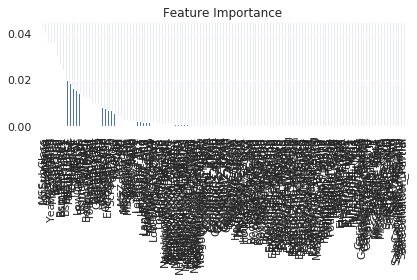

In [73]:
# 畫出feature importance
feat_labels = df.columns[1:]  # 取欄位名
importances = model_RFC.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train_x.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(train_x.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(train_x.shape[1]),
           feat_labels,
           rotation=90)
plt.xlim([-1, train_x.shape[1]])
plt.tight_layout()
plt.show()

In [74]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model_RFC, threshold=0.01, prefit=True)  # 特徵重要性門檻值設為0.01
x_selected = sfm.transform(train_x)
print('Number of samples that meet this criterion:',
     x_selected.shape[0])

Number of samples that meet this criterion: 1022


In [75]:
for f in range(x_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) GrLivArea                      0.042318
 2) TotalBsmtSF                    0.040419
 3) GarageArea                     0.036709
 4) YearBuilt                      0.036517
 5) 1stFlrSF                       0.036399
 6) LotArea                        0.036209
 7) BsmtUnfSF                      0.035791
 8) GarageYrBlt                    0.035502
 9) BsmtFinSF1                     0.031598
10) LotFrontage                    0.030146
11) YearRemodAdd                   0.029530
12) OpenPorchSF                    0.027123
13) OverallQual                    0.025482
14) TotRmsAbvGrd                   0.024452
15) MoSold                         0.020436
16) YrSold                         0.019754
17) WoodDeckSF                     0.019700
18) 2ndFlrSF                       0.018573
19) MSSubClass                     0.018366
20) BsmtFinType1                   0.017636
21) MasVnrArea                     0.016317
22) FireplaceQu                    0.015498
23) ExterQual                   

In [76]:
# 保留重要特徵值欄位
fea_imp = []
for f in range(x_selected.shape[1]):
    fea_imp.append(feat_labels[indices[f]])

fea_imp[-5] = 'GarageType'  # One-Hot Encodeing 的欄位恢復原名
fea_imp[-12] = 'LotShape'  # 同上
#fea_imp = fea_imp[:-1]
fea_imp

['GrLivArea',
 'TotalBsmtSF',
 'GarageArea',
 'YearBuilt',
 '1stFlrSF',
 'LotArea',
 'BsmtUnfSF',
 'GarageYrBlt',
 'BsmtFinSF1',
 'LotFrontage',
 'YearRemodAdd',
 'OpenPorchSF',
 'OverallQual',
 'TotRmsAbvGrd',
 'MoSold',
 'YrSold',
 'WoodDeckSF',
 '2ndFlrSF',
 'MSSubClass',
 'BsmtFinType1',
 'MasVnrArea',
 'FireplaceQu',
 'ExterQual',
 'LotShape',
 'GarageFinish',
 'LotShape_Reg',
 'GarageType_Attchd',
 'HeatingQC',
 'BsmtExposure',
 'GarageCars',
 'GarageType',
 'BsmtFullBath',
 'BedroomAbvGr',
 'LotShape_IR1',
 'FullBath']

# XGBoosting(資料不進行標準化)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
xgb.__version__

'0.80'

In [78]:
# 將資料存成xgboost要求的型態
data_train = xgb.DMatrix(train_x, label=train_y)
data_test = xgb.DMatrix(test_x, label=test_y)

In [79]:
%%time
# 給予模型參數，告知演算法該如何訓練模型
param = {}
param['objective'] = 'reg:linear' # 做線性回歸
param['tree_method'] = 'auto'
param['silent'] = 0
param['max_depth'] = 10
param['lambda'] = 0.3
param['alpha'] = 0.7
eval_list = [(data_train,'train'),(data_test,'test')]
num_round = 30
eval_history={}

# 訓練模型
model_xgboost = xgb.train(param, data_train, num_round, eval_list, evals_result = eval_history, verbose_eval = False)

[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=9
[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=10
[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=10
[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=10
[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=10
[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=10
[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=10
[17:00:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 288 extra nodes, 0 pru

In [80]:
rmse_train = eval_history['train']['rmse']
rmse_test = eval_history['test']['rmse']

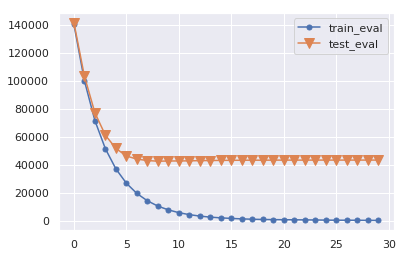

In [81]:
plt.plot(rmse_train,ms=10,marker='.',label='train_eval')
plt.plot(rmse_test,ms=10,marker='v',label='test_eval')
plt.legend()
plt.show()

In [82]:
# 檢視最後rms error
model_xgboost.eval(data_test)

'[0]\teval-rmse:43407.949219'

# XGBoosting: 以$R^2$評估回歸結果

In [83]:
#from sklearn.metrics import r2_score
pred_y = model_xgboost.predict(data_test)
r2_score(test_y,pred_y)

0.6956559166359586

# XGBoost: 檢視各欄位重要性

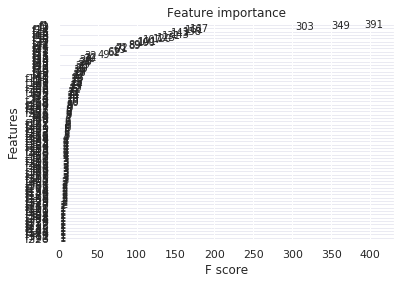

In [84]:
from xgboost import plot_importance

plot_importance(model_xgboost)
plt.show()

# 找出房價離群值

In [85]:
max_stdPrice = np.mean(y) + np.std(y) * 3
min_stdPrice = np.mean(y) - np.std(y) * 3
outlier = []
for i in range(len(y)):
    if y[i] > max_stdPrice:
        outlier += [i]
    elif y[i] < min_stdPrice:
        outlier += [i]

In [86]:
# 刪除離群值資料
df_new = dfTrain.drop(outlier, axis = 0)

In [87]:
# 選取重要特徵值欄位
fea_imp.append('SalePrice')
df_new = df_new[fea_imp]

KeyError: "['LotShape_Reg' 'GarageType_Attchd' 'LotShape_IR1'] not in index"

In [ ]:
# 觀察欄位名 屬性 非空值筆數
df_new.info()

In [ ]:
#(資料筆數,欄位數)
df_new.shape

In [ ]:
# 觀察欄位不重複值
df_new.apply(lambda x:x.unique().shape[0],axis=0)

In [ ]:
plt.figure(figsize=(12,12),dpi=200)  # 調整圖片尺寸
(df_new.apply(lambda x:x.unique().shape[0],axis=0)/df_new.shape[0]).plot(kind='bar');

In [ ]:
# 空值數量
df_new.isnull().sum()

In [ ]:
# 空值欄位
df_new.loc[:,pd.Series(df_new.isnull().any())]

## 挑選重要特徵值欄位與清掉房價離群值後的資料清理

In [ ]:
# 補0和None
b = ["GarageYrBlt","LotFrontage",]
df_new[b] = df_new[b].fillna(0)

d = ["BsmtFinType1","GarageFinish","FireplaceQu","BsmtQual","BsmtExposure","GarageType"]
df_new[d] = df_new[d].fillna('None')

In [ ]:
# 眾值
#["MasVnrArea"]
df_new["MasVnrArea"] = df_new["MasVnrArea"].fillna("0.0")

#df_new["MasVnrArea"].mode()  # 觀察眾值

In [ ]:
# 類別型數據編碼(one-hot encodeing)-1

le_LotShape = LabelEncoder().fit(df_new["LotShape"])
LotShape_label = le_LotShape.transform(df_new["LotShape"])
ohe_LotShape = OneHotEncoder(sparse=False).fit(LotShape_label.reshape(-1,1))
LotShape_ohe = ohe_LotShape.transform(LotShape_label.reshape(-1,1))
df_new["LotShape_IR1"] = LotShape_ohe[:,0]
df_new["LotShape_IR2"] = LotShape_ohe[:,1]
df_new["LotShape_IR3"] = LotShape_ohe[:,2]
df_new["LotShape_Reg"] = LotShape_ohe[:,3]
df_new = df_new.drop(["LotShape"], axis=1)

In [ ]:
# 類別型數據編碼(有序)-2

ExterQual_mapping = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df_new["ExterQual"]=df_new["ExterQual"].map(ExterQual_mapping)

In [ ]:
# 類別型數據編碼(有序)-3

BsmtQual_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df_new["BsmtQual"]=df_new["BsmtQual"].map(BsmtQual_mapping)

In [ ]:
# 類別型數據編碼(有序)-4

BsmtExposure_mapping = {"NA":0,"No":1,"Mn":2,"Av":3,"Gd":4}
df_new["BsmtExposure"]=df_new["BsmtExposure"].map(BsmtExposure_mapping)

In [ ]:
# 類別型數據編碼(有序)-5

BsmtFinType1_mapping = {"NA":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}
df_new["BsmtFinType1"]=df_new["BsmtFinType1"].map(BsmtFinType1_mapping)

In [ ]:
# 類別型數據編碼(有序)-6

HeatingQC_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df_new["HeatingQC"]=df_new["HeatingQC"].map(HeatingQC_mapping)

In [ ]:
# 類別型數據編碼(有序)-7

KitchenQual_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df_new["KitchenQual"]=df_new["KitchenQual"].map(KitchenQual_mapping)

In [ ]:
# 類別型數據編碼(有序)-8

FireplaceQu_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
df_new["FireplaceQu"]=df_new["FireplaceQu"].map(FireplaceQu_mapping)

In [ ]:
# 類別型數據編碼(one-hot encodeing)-9

le_GarageType = LabelEncoder().fit(df_new["GarageType"])
GarageType_label = le_GarageType.transform(df_new["GarageType"])
ohe_GarageType = OneHotEncoder(sparse=False).fit(GarageType_label.reshape(-1,1))
GarageType_ohe = ohe_GarageType.transform(GarageType_label.reshape(-1,1))
df_new["GarageType_2Types"] = GarageType_ohe[:,0]
df_new["GarageType_Attchd"] = GarageType_ohe[:,1]
df_new["GarageType_Basment"] = GarageType_ohe[:,2]
df_new["GarageType_BuiltIn"] = GarageType_ohe[:,3]
df_new["GarageType_CarPort"] = GarageType_ohe[:,4]
df_new["GarageType_Detchd"] = GarageType_ohe[:,5]
df_new["GarageType_None"] = GarageType_ohe[:,6]
df_new = df_new.drop(["GarageType"], axis=1)

In [ ]:
# 類別型數據編碼(有序)-10

GarageFinish_mapping = {"NA":0,"Unf":1,"RFn":2,"Fin":3}
df_new["GarageFinish"]=df_new["GarageFinish"].map(GarageFinish_mapping)

In [ ]:
# 欄位補0或None
d = ["BsmtQual","BsmtExposure","BsmtFinType1","FireplaceQu","GarageFinish"]  ## 資料刪選清理後補0
df_new[d] = df_new[d].fillna(0)

In [ ]:
# 切割訓練 測試資料
from sklearn.model_selection import train_test_split

x = df_new.drop('SalePrice', axis = 1).values  ## 清理後資料
y = df_new['SalePrice'].values  ## 清理後資料
    
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

# 正式訓練模型

#train_x = df.iloc[:, 1:].values  # 去除ID和預測目標欄位
#train_y = dfTrain['SalePrice'].values

#test_x = df.iloc[:, 1:].values

In [ ]:
assert train_x.shape[0] == train_y.shape[0],"error, check my data!"

In [ ]:
# 資料標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# 觀察標準化結果
np.mean(train_x), np.std(train_x)  

# Scikit-learn: Ridge Regression

In [ ]:
# 建模
from sklearn.linear_model import Ridge

regressor = Ridge(max_iter=1000000)
model_Ridge = regressor.fit(train_x,train_y)

In [ ]:
# 預測
from sklearn.metrics import r2_score
pred_y = model_Ridge.predict(test_x)
r2_score(test_y,pred_y)

# Scikit-learn: Lasso Regression

In [ ]:
# 建模
from sklearn.linear_model import Lasso

regressor = Lasso(max_iter=1000000)
model_Lasso = regressor.fit(train_x,train_y)

In [ ]:
# 預測
#from sklearn.metrics import r2_score
pred_y = model_Lasso.predict(test_x)
r2_score(test_y,pred_y)

# Scikit-learn: Elastic Net Regression

In [ ]:
# 建模
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(max_iter=1000000)
model_ElasticNet = regressor.fit(train_x,train_y)

In [ ]:
# 預測
#from sklearn.metrics import r2_score
pred_y = model_ElasticNet.predict(test_x)
r2_score(test_y,pred_y)

# Scikit-learn: 樹演算法

In [ ]:
# 建模
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier(criterion='entropy',   # 預設為'gini'  #entropy
                                   splitter='best',                       # 預設為best  #random
                                   max_depth=11,                     # 樹的深度
                                   min_samples_split=2,             # 分解節點時，最少樣本數 
                                   min_samples_leaf=1,              # 每個節點最少樣本數
                                   #min_weight_fraction_leaf=0.0, # 每個樣本的權重
                                   #max_features=None,             
                                   random_state=0,
                                   #max_leaf_nodes=None,           # 以雜質相對少的方式種樹，None代表無限制
                                   #min_impurity_decrease=0.0,      # 如果分裂將使雜質減少，則分裂節點
                                   #min_impurity_split=None,          # 樹木早期生長的門檻 以前一個參數為主
                                   class_weight='balanced' ,          # 權重形式 'balanced' 或 None
                                   presort=False)                         # 是否預先分配數據，加快最佳分裂的發現
model_DTC = regressor.fit(train_x,train_y)

In [ ]:
# 預測
#from sklearn.metrics import r2_score
pred_y = model_DTC.predict(test_x)
r2_score(test_y,pred_y)

In [ ]:
# 觀察屬性值重要性，值越大越重要
print(model_DTC.feature_importances_)

# Random Forest regression 隨機森林

In [ ]:
# 建模
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=100,    # 樹的數量
                                   criterion='gini',                       # 預設為'gini'  'entropy'
                                   #max_depth=None,                   # 預設為None 無限制
                                   #min_samples_split=2,
                                   #min_samples_leaf=1,
                                   #min_weight_fraction_leaf=0.0,
                                   max_features='auto',                 # 尋找最佳分割所考慮的功能 'auto' 'sqrt' 'log2' 'None' int float
                                   #max_leaf_nodes=None,
                                   #min_impurity_decrease=0.0,
                                   #min_impurity_split=None,
                                   bootstrap=False,                      # 種樹時是否使用 bootstrap 的樣本
                                   #oob_score=False,
                                   n_jobs=-1,                               # 最大工作數 -1代表使用全部的處理器
                                   random_state=3,
                                   #verbose=0,                              # 在擬合和預設時顯示控制詳細程度 (只是顯示步驟而已 對預測確率沒幫助)
                                   warm_start=False)                   # 設為True時，是以補充隨機森林模型的方式運算
                                   #class_weight=None)                 # 'None' 'balanced' 'balanced_subsample'
%time model_RFC = regressor.fit(train_x,train_y)

In [ ]:
# 預測
#from sklearn.metrics import r2_score
pred_y = model_RFC.predict(test_x)
%time r2_score(test_y,pred_y)

# XGBoosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
xgb.__version__

In [ ]:
# 將資料存成xgboost要求的型態
data_train = xgb.DMatrix(train_x, label=train_y)
data_test = xgb.DMatrix(test_x, label=test_y)

In [ ]:
%%time
# 給予模型參數，告知演算法該如何訓練模型
param = {}
param['objective'] = 'reg:linear' # 做線性回歸
param['tree_method'] = 'auto'
param['silent'] = 0
param['max_depth'] = 12
param['lambda'] = 0.8
param['alpha'] = 0.2
eval_list = [(data_train,'train'),(data_test,'test')]
num_round = 30
eval_history={}

# 訓練模型
model_xgboost = xgb.train(param, data_train, num_round, eval_list, evals_result = eval_history, verbose_eval = False)

In [ ]:
rmse_train = eval_history['train']['rmse']
rmse_test = eval_history['test']['rmse']

In [ ]:
plt.plot(rmse_train,ms=10,marker='.',label='train_eval')
plt.plot(rmse_test,ms=10,marker='v',label='test_eval')
plt.legend()
plt.show()

In [ ]:
# 檢視最後rms error
model_xgboost.eval(data_test)

# XGBoosting: 以$R^2$評估回歸結果

In [ ]:
#from sklearn.metrics import r2_score
pred_y = model_xgboost.predict(data_test)
r2_score(test_y,pred_y)

# PCA降維後再做XGBoost

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x = df_new.drop('SalePrice', axis = 1).values  ## 清理後資料
y = df_new['SalePrice'].values  ## 清理後資料

In [ ]:
x.shape

In [ ]:
pca = PCA(n_components=37)  # 模型會把資料投影至一個方向
pca = pca.fit(x)  # fit資料，模型會根據資料特性，來找出恰當的方向向量
unit_vec = pca.components_  # 找到方向向量
reduced_df = pca.transform(x) # 將資料投影到找出來的方向向量上
# reduced_df即為降維後的資料
reduced_df.shape

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
# 將資料存成xgboost要求的型態
data_train = xgb.DMatrix(train_x, label=train_y)
data_test = xgb.DMatrix(test_x, label=test_y)

In [ ]:
%%time
# 給予模型參數，告知演算法該如何訓練模型
param = {}
param['objective'] = 'reg:linear' # 做線性回歸
param['tree_method'] = 'auto'
param['silent'] = 0
param['max_depth'] = 15
param['lambda'] = 0.8
param['alpha'] = 0.2
eval_list = [(data_train,'train'),(data_test,'test')]
num_round = 30
eval_history={}

# 訓練模型
model_xgboost = xgb.train(param, data_train, num_round, eval_list, evals_result = eval_history, verbose_eval = False)

In [ ]:
#from sklearn.metrics import r2_score
pred_y = model_xgboost.predict(data_test)
r2_score(test_y,pred_y)

# 清理test.csv資料

In [ ]:
#fea_imp = fea_imp[:-1]
#fea_imp.append('BsmtQual')
dfTest = dfTest[fea_imp]

In [ ]:
# 觀察欄位名 屬性 非空值筆數
dfTest.info()

In [ ]:
#(資料筆數,欄位數)
dfTest.shape

In [ ]:
# 觀察欄位不重複值
dfTest.apply(lambda x:x.unique().shape[0],axis=0)

In [ ]:
plt.figure(figsize=(12,12),dpi=200)  # 調整圖片尺寸
(df_new.apply(lambda x:x.unique().shape[0],axis=0)/df_new.shape[0]).plot(kind='bar');

In [ ]:
# 空值數量
dfTest.isnull().sum()

In [ ]:
# 空值欄位
dfTest.loc[:,pd.Series(dfTest.isnull().any())]

In [ ]:
# 補0和None
b = ["GarageYrBlt","LotFrontage","GarageCars","BsmtFullBath","BsmtUnfSF","BsmtFinSF1","GarageArea","TotalBsmtSF","MasVnrArea"]
dfTest[b] = dfTest[b].fillna(0)

d = ["BsmtFinType1","GarageFinish","FireplaceQu","BsmtQual","BsmtExposure","GarageType","KitchenQual"]
dfTest[d] = dfTest[d].fillna('None')

In [ ]:
# 類別型數據編碼(one-hot encodeing)-1

le_LotShape = LabelEncoder().fit(dfTest["LotShape"])
LotShape_label = le_LotShape.transform(dfTest["LotShape"])
ohe_LotShape = OneHotEncoder(sparse=False).fit(LotShape_label.reshape(-1,1))
LotShape_ohe = ohe_LotShape.transform(LotShape_label.reshape(-1,1))
dfTest["LotShape_IR1"] = LotShape_ohe[:,0]
dfTest["LotShape_IR2"] = LotShape_ohe[:,1]
dfTest["LotShape_IR3"] = LotShape_ohe[:,2]
dfTest["LotShape_Reg"] = LotShape_ohe[:,3]
dfTest = dfTest.drop(["LotShape"], axis=1)

In [ ]:
# 類別型數據編碼(有序)-2

ExterQual_mapping = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
dfTest["ExterQual"]=dfTest["ExterQual"].map(ExterQual_mapping)

In [ ]:
# 類別型數據編碼(有序)-3

BsmtQual_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
dfTest["BsmtQual"]=dfTest["BsmtQual"].map(BsmtQual_mapping)

In [ ]:
# 類別型數據編碼(有序)-4

BsmtExposure_mapping = {"NA":0,"No":1,"Mn":2,"Av":3,"Gd":4}
dfTest["BsmtExposure"]=dfTest["BsmtExposure"].map(BsmtExposure_mapping)

In [ ]:
# 類別型數據編碼(有序)-5

BsmtFinType1_mapping = {"NA":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}
dfTest["BsmtFinType1"]=dfTest["BsmtFinType1"].map(BsmtFinType1_mapping)

In [ ]:
# 類別型數據編碼(有序)-6

HeatingQC_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
dfTest["HeatingQC"]=dfTest["HeatingQC"].map(HeatingQC_mapping)

In [ ]:
# 類別型數據編碼(有序)-7

KitchenQual_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
dfTest["KitchenQual"]=dfTest["KitchenQual"].map(KitchenQual_mapping)

In [ ]:
# 類別型數據編碼(有序)-8

FireplaceQu_mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
dfTest["FireplaceQu"]=dfTest["FireplaceQu"].map(FireplaceQu_mapping)

In [ ]:
# 類別型數據編碼(one-hot encodeing)-9

le_GarageType = LabelEncoder().fit(dfTest["GarageType"])
GarageType_label = le_GarageType.transform(dfTest["GarageType"])
ohe_GarageType = OneHotEncoder(sparse=False).fit(GarageType_label.reshape(-1,1))
GarageType_ohe = ohe_GarageType.transform(GarageType_label.reshape(-1,1))
dfTest["GarageType_2Types"] = GarageType_ohe[:,0]
dfTest["GarageType_Attchd"] = GarageType_ohe[:,1]
dfTest["GarageType_Basment"] = GarageType_ohe[:,2]
dfTest["GarageType_BuiltIn"] = GarageType_ohe[:,3]
dfTest["GarageType_CarPort"] = GarageType_ohe[:,4]
dfTest["GarageType_Detchd"] = GarageType_ohe[:,5]
dfTest["GarageType_None"] = GarageType_ohe[:,6]
dfTest = dfTest.drop(["GarageType"], axis=1)

In [ ]:
# 類別型數據編碼(有序)-10

GarageFinish_mapping = {"NA":0,"Unf":1,"RFn":2,"Fin":3}
dfTest["GarageFinish"]=dfTest["GarageFinish"].map(GarageFinish_mapping)

In [ ]:
# 欄位補0或None
d = ["BsmtQual","BsmtExposure","BsmtFinType1","FireplaceQu","GarageFinish","KitchenQual"]  ## 資料刪選清理後補0
dfTest[d] = dfTest[d].fillna(0)

# test.csv資料預測

In [ ]:
### XGBoost
pred_xgboost = model_xgboost.predict(dfTest)

In [ ]:
# Ridge regression
pred_Ridge = model_Ridge.predict(dfTest)

In [ ]:
# Lasso regression
pred_Lasso = model_Lasso.predict(dfTest)

In [ ]:
# Elastic Net regression
pred_ElasticNet = model_ElasticNet.predict(dfTest)

In [ ]:
# 決策樹
pred_DTC = model_DTC.predict(dfTest)

In [ ]:
# 隨機森林
#from sklearn.metrics import r2_score
pred_RFC = model_RFC.predict(dfTest)

In [ ]:
pred_RFC.to_csv('/home/bigred/jupyterNotebook/kilio/submission.csv')